# Logistic Map

### An iterative function (difference equation), aka quadratic recurrence equation) that can model how populations grow over time. 

$\Large x_{n+1} = ax_n(1 − x_n), \quad n = 0, 1, 2...  \quad  0 ≤ a ≤ 4 , \quad 0 ≤ x_0 ≤1  $ 

#### $x_n$ denotes the population density at time (in the year) n

#### For a > 1, the nonlinearity $−ax_n^2$ restricts the growth due to lack of resources (limited foods) and leads to a saturation.

#### Depending on a, we have one or two stationary solutions, namely
$\large x_s = 0 \quad \forall a, \quad x_s = 1 − 1/a \quad for \quad 1 < a ≤ 4$

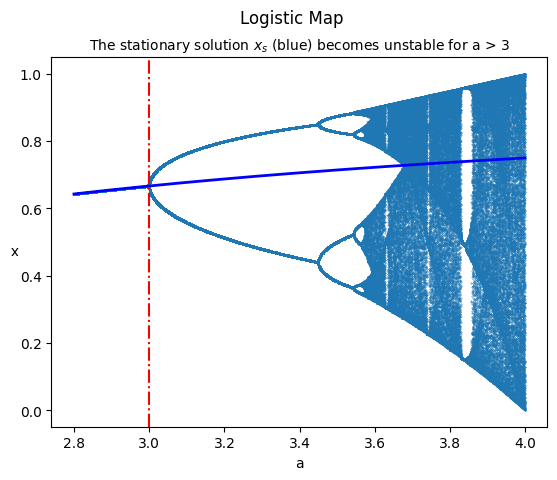

In [3]:
import matplotlib.pyplot as plt
import numpy as np

amin = 2.8
amax = 4.0
itmax = 200    # number of iterations for which we will calculate values
ivor = 1000    # number of iterations to ignore initially (to let the system settle)
tiny = 1e-6    # small initial value for x
da = (amax - amin) / 1000.0     # increment step for a

a_values = []
x_values = []
xs_values =[]

for a in range(int(amin * 1000), int(amax * 1000), int(da * 1000)):
    a /= 1000.0                             # scales a back to the correct range.
    x = tiny                                # initializes x for each a
    for it in range(1, itmax + ivor + 1):
        x = a * x * (1.0 - x)
        if it > ivor:                       # store the values after ivor iterations
            a_values.append(a)
            x_values.append(x)
            xs_values.append(1 - 1 / a)

# Steady solution x_{s}(a) in bold
plt.plot(a_values, xs_values, 'b-', lw=2)
plt.axvline(x = 3, color = 'r', linestyle='-.')

plt.scatter(a_values, x_values, s=0.1)
plt.xlabel('a')
plt.ylabel('x', rotation=180)
plt.suptitle('Logistic Map')
plt.title("The stationary solution $x_s$ (blue) becomes unstable for a > 3", y=1, fontsize=10)
plt.show()
# Save the figure
#plt.savefig('Logistic Map.jpg')

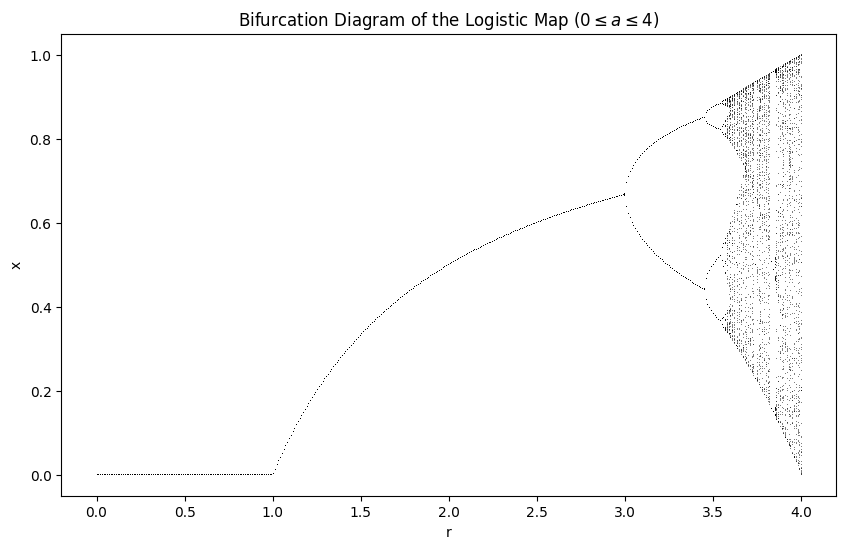

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic map function
def logistic_map(x, r):
    return r * x * (1 - x)

# Parameters
r_values = np.linspace(0, 4, 400)
iterations = 1000
last = 100  # number of iterations to plot

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over values of r
for r in r_values:
    x = 0.1  # initial value
    # Iterate logistic map
    for i in range(iterations):
        x = logistic_map(x, r)
        # Only plot the last iterations
        if i >= (iterations - last):
            ax.plot(r, x, ',k', alpha=0.5)  # plot x against r

ax.set_xlabel('r')
ax.set_ylabel('x')
ax.set_title('Bifurcation Diagram of the Logistic Map ($ 0\leq a \leq 4$)')
plt.show()

# Save the figure
#plt.savefig('Logistic Map full.jpg')

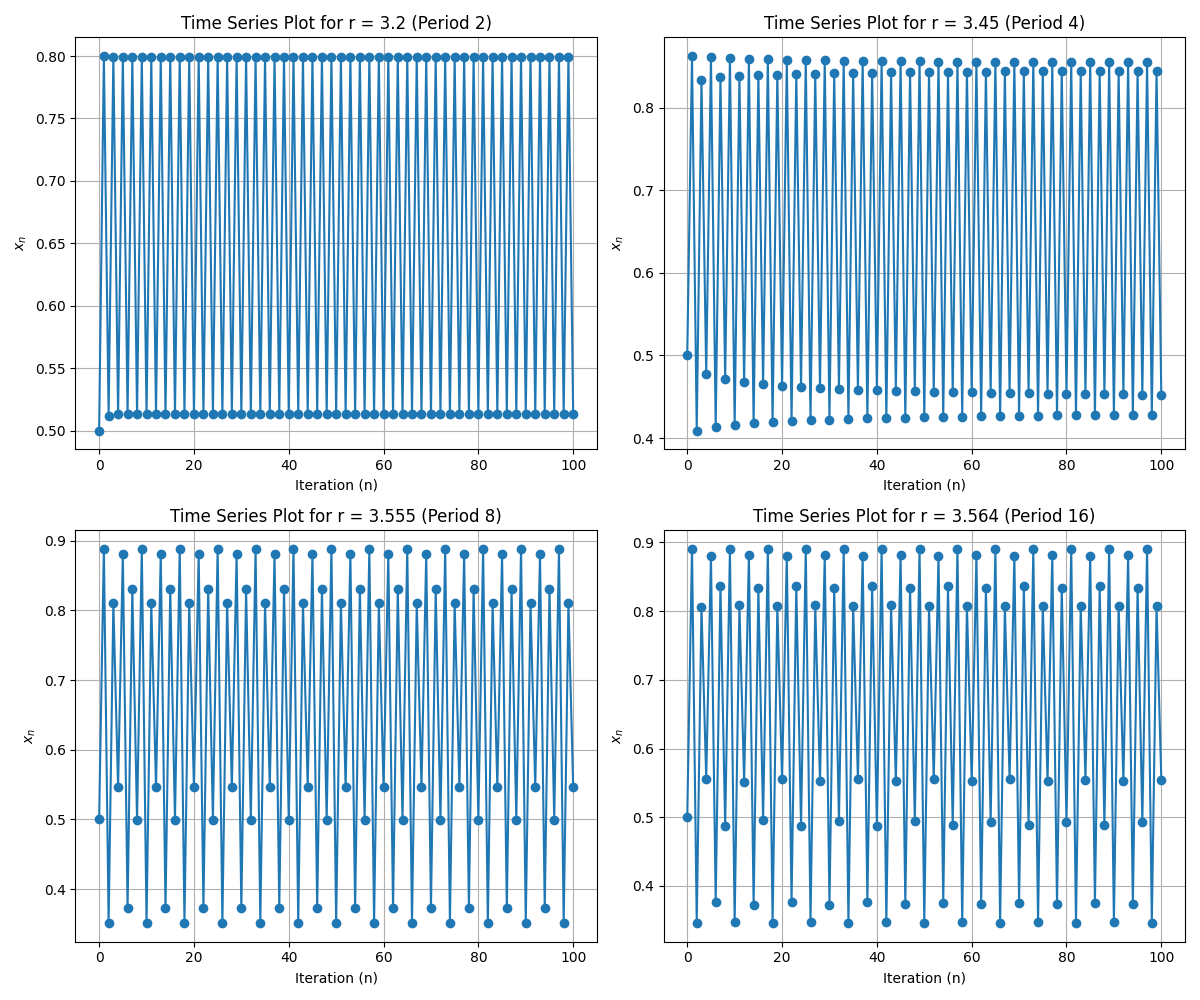

In [16]:
import matplotlib.pyplot as plt

def logistic_map(r, x0, n_iter):
    x = [x0]
    for _ in range(n_iter):
        x_next = r * x[-1] * (1 - x[-1])
        x.append(x_next)
    return x

# Parameters
r_values = [3.2, 3.45, 3.555, 3.564]
x0 = 0.5  # initial value
n_iter = 100  # number of iterations

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for idx, r in enumerate(r_values):
    x = logistic_map(r, x0, n_iter)
    ax = axs[idx // 2, idx % 2]
    ax.plot(range(n_iter + 1), x, marker='o', linestyle='-')
    ax.set_title(f'Time Series Plot for r = {r} (Period {2**(idx+1)})')
    ax.set_xlabel('Iteration (n)')
    ax.set_ylabel('$x_n$')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Save the figure
#plt.savefig('Logistic Map periods.jpg')

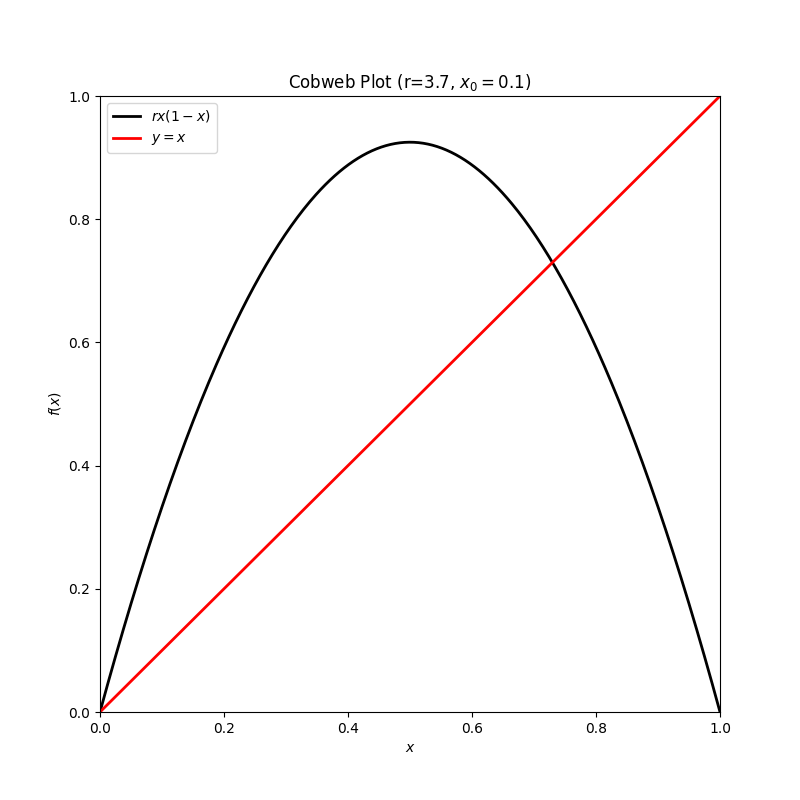

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#from IPython.display import HTML
#Enable the ipympl backend in your notebook
%matplotlib widget

def logistic_map(r, x):
    return r * x * (1 - x)

def update(frame, x, r, ax, lines):
    x_new = logistic_map(r, x[-1])
    lines.append(ax.plot([x[-1], x[-1]], [x[-1], x_new], 'b', lw=1)[0])
    lines.append(ax.plot([x[-1], x_new], [x_new, x_new], 'b', lw=1)[0])
    x.append(x_new)
    return lines
(1,2)
def cobweb_animation(r, x0, iterations):
    fig, ax = plt.subplots(figsize=(8, 8))
    x = np.linspace(0, 1, 400)
    y = logistic_map(r, x)

    ax.plot(x, y, 'k', lw=2, label=r'$rx(1-x)$')
    ax.plot(x, x, 'r', lw=2, label='$y=x$')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f'Cobweb Plot (r={r}, $x_0=${x0})')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x)$')
    ax.legend()

    x_data = [x0]
    lines = []

    ani = animation.FuncAnimation(fig, update, frames=range(iterations), fargs=(x_data, r, ax, lines), blit=True, interval=100, repeat=False)
    
    #plt.close(fig)
    return ani

# Example usage
r = 3.7  # You can change this value
x0 = 0.1  # Initial value
iterations = 100  # Number of iterations

ani = cobweb_animation(r, x0, iterations)
#HTML(ani.to_jshtml())
plt.show()

# If you want to save the animation as a gif, uncomment the following line:
#ani.save('LogistMap_cobweb.gif', writer='pillow', fps=5)

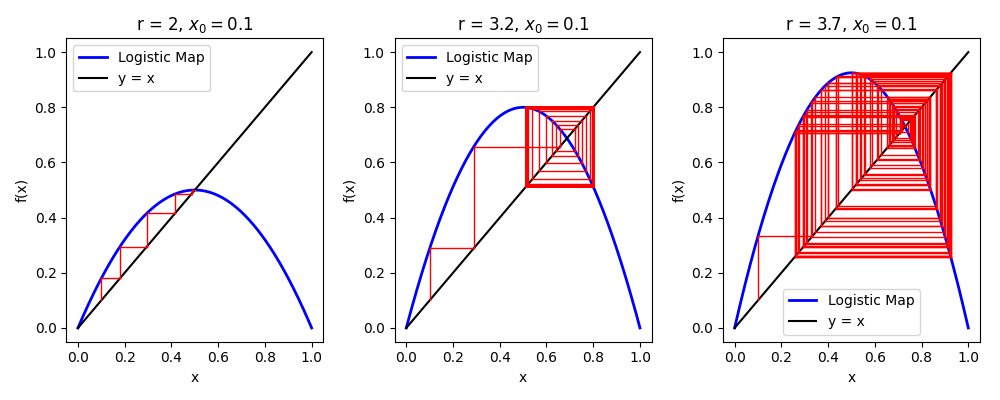

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib widget

# Define the logistic map function
def logistic_map(x, r):
    return r * x * (1 - x)

# Parameters
r_values = [2, 3.2, 3.7]
x0 = 0.1  # initial value
iterations = 100

# Create figure and axis objects
fig, axes = plt.subplots(1, len(r_values), figsize=(10, 4))

# Function to create cobweb plot for a given r
def cobweb_plot(ax, r, x0, iterations):
    x = np.linspace(0, 1, 400)
    ax.plot(x, logistic_map(x, r), 'b', lw=2, label='Logistic Map')
    ax.plot(x, x, 'k', label='y = x')  # y = x line

    x_n = x0
    for _ in range(iterations):
        y_n = logistic_map(x_n, r)
        ax.plot([x_n, x_n], [x_n, y_n], 'r', lw=1)
        ax.plot([x_n, y_n], [y_n, y_n], 'r', lw=1)
        x_n = y_n

    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()
    ax.set_title(f'r = {r}, $x_0=${x0}')

# Initialize the plot
for i, r in enumerate(r_values):
    cobweb_plot(axes[i], r, x0, iterations)

# Animation function
def animate(i):
    for ax in axes:
        ax.cla()  # Clear the previous frame
    for idx, r in enumerate(r_values):
        cobweb_plot(axes[idx], r, x0, i + 1)
    return axes

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=iterations, interval=100)

plt.tight_layout()
plt.show()

# If you want to save the animation as a gif, uncomment the following line:
#ani.save('LogistMap_cobweb.gif', writer='pillow', fps=5)